In [1]:
train="/content/simple_regression_train.csv"
test="/content/simple_regression_test.csv"
sample="/content/simple_regression_submission.csv"

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv(train)
df.head(10)

,t,y
0,0.00,0.477247
1,0.02,0.532101
2,0.04,0.544203
3,0.06,0.503014
4,0.08,0.639919
5,0.10,0.642363
6,0.12,0.636889
7,0.14,0.630250
8,0.16,0.708465
9,0.18,0.658038


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t       1000 non-null   float64
 1   y       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


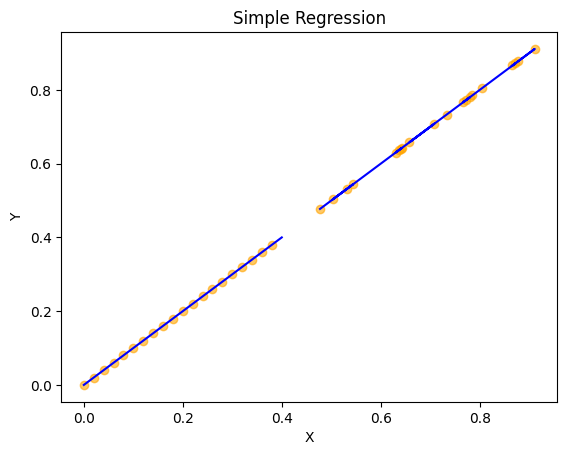

In [16]:
plt.plot(df.loc[0:20],df.loc[0:20],color="blue")
plt.scatter(df.iloc[0:20],df.iloc[0:20],color="orange",alpha=0.6)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Regression")
plt.show()

## Linear Regression

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [19]:
X=df['t']
y=df['y']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [97]:
lr=LinearRegression()
lr.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression()

In [98]:
y_pred=lr.predict(X_test.values.reshape(-1,1))
mean_squared_error(y_test,y_pred)
# from sklearn.metrics import r2_score
# r2_score(y_test,y_pred)

0.24032660990454

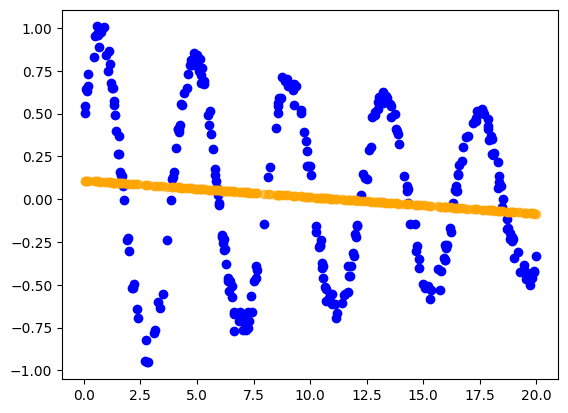

In [99]:
plt.scatter(X_test,y_test,color="blue")
plt.scatter(X_test,y_pred,color="orange",alpha=0.6)

## Linear using Math formula

In [102]:
# y=mx+c
import numpy as np
df1=pd.read_csv(train)

In [106]:
x_sum=np.sum(df1['t'])
y_sum=np.sum(df1['y'])
xy_sum=np.sum(df1['t']*df1['y'])
x_sqr_sum=np.sum(df1['t']**2)

In [107]:
m=(xy_sum-((x_sum*y_sum)/len(df1)))/(x_sqr_sum-((x_sum**2)/len(df1)))
c=(y_sum-m*x_sum)/len(df1)

In [111]:
df1_test=pd.read_csv(test)
df1_test['y']=m*df1_test['t']+c

In [113]:
sub=pd.DataFrame()
sub['t']=df1_test['t']
sub['y']=df1_test['y']
sub.to_csv('sub.csv',index=False)

## Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
rf=RandomForestRegressor()
rf.fit(X_train.values.reshape(-1,1),y_train)

RandomForestRegressor()

In [93]:
y_pred_rf=lr.predict(X_test.values.reshape(-1,1))
mean_squared_error(y_test,y_pred_rf)

0.2391419582109993

## Prediction

In [27]:
df_test=pd.read_csv(test)
df_test.head()

,t
0,20.00
1,20.02
2,20.04
3,20.06
4,20.08


In [94]:
y_new=lr.predict(df_test['t'].values.reshape(-1,1))

In [95]:
submission=pd.DataFrame()
submission['t']=df_test['t']
submission['y']=y_new
submission.to_csv('submission.csv',index=False)